<a href="https://colab.research.google.com/github/Gustavo-hen/gsi073/blob/main/Regressao_logistica_alteradogpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# 1. Carregar dados
iris = sklearn.datasets.load_iris()
X = iris.data        # 4 features: sépalas e pétalas
y = (iris.target == 1).astype(float)  # 1 se Versicolor, 0 caso contrário

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preparar os dados para PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
# 4. Definir modelo: regressão logística
modelo = torch.nn.Linear(4, 1)  # 4 features → 1 saída (probabilidade de ser Versicolor)

# 5. Definir função de perda e algoritmo de otimização
funcao_perda = torch.nn.BCEWithLogitsLoss()  # combinação de sigmoid + BCE
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.1)

Época [10/1000], Loss (treinamento): 0.5213
Época [20/1000], Loss (treinamento): 0.5211
Época [30/1000], Loss (treinamento): 0.5210
Época [40/1000], Loss (treinamento): 0.5209
Época [50/1000], Loss (treinamento): 0.5207
Época [60/1000], Loss (treinamento): 0.5206
Época [70/1000], Loss (treinamento): 0.5205
Época [80/1000], Loss (treinamento): 0.5204
Época [90/1000], Loss (treinamento): 0.5202
Época [100/1000], Loss (treinamento): 0.5201
Época [100/1000], Acurácia (teste): 76.67%
Época [110/1000], Loss (treinamento): 0.5200
Época [120/1000], Loss (treinamento): 0.5199
Época [130/1000], Loss (treinamento): 0.5198
Época [140/1000], Loss (treinamento): 0.5197
Época [150/1000], Loss (treinamento): 0.5195
Época [160/1000], Loss (treinamento): 0.5194
Época [170/1000], Loss (treinamento): 0.5193
Época [180/1000], Loss (treinamento): 0.5192
Época [190/1000], Loss (treinamento): 0.5191
Época [200/1000], Loss (treinamento): 0.5190
Época [200/1000], Acurácia (teste): 76.67%
Época [210/1000], Loss 

NameError: name 'losses' is not defined

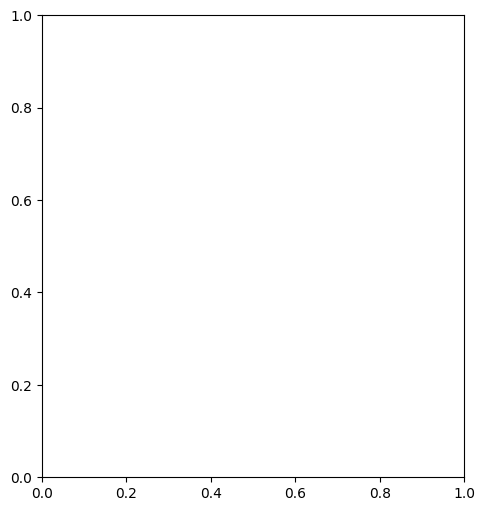

In [ ]:
# 6. Treinamento
for epoch in range(1000):
    modelo.train()  # Define o modelo para modo de treinamento

    optimizer.zero_grad()  # Zera os gradientes
    outputs = modelo(X_train)  # Faz a previsão para os dados de treino
    loss = funcao_perda(outputs, y_train)  # Calcula a perda
    loss.backward()  # Calcula os gradientes
    optimizer.step()  # Atualiza os pesos do modelo

    # A cada 10 épocas, exibe o valor da perda no conjunto de treino
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/1000], Loss (treinamento): {loss.item():.4f}")

    # Avaliar no conjunto de teste a cada 100 épocas
    if (epoch + 1) % 100 == 0:
        modelo.eval()  # Muda para o modo de avaliação
        with torch.no_grad():  # Desliga o cálculo de gradientes (não precisa para validação)
            outputs_test = modelo(X_test)  # Faz a previsão no conjunto de teste
            # Aplica o sigmoid para converter a saída em probabilidade
            y_pred = torch.sigmoid(outputs_test)
            y_pred = y_pred.round()  # Converte as probabilidades em 0 ou 1

            # Calcula a acurácia
            accuracy = (y_pred.eq(y_test).sum().item()) / y_test.size(0)
            print(f"Época [{epoch+1}/1000], Acurácia (teste): {accuracy*100:.2f}%")


# 8. Gerar gráficos
epochs = range(10, 1001, 10)  # épocas em que a perda foi registrada

# Plotando o gráfico de Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Plot 1: Loss
plt.plot(epochs, losses, marker='o', color='b', label='Loss (treinamento)')
plt.title('Evolução da Loss durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plotando o gráfico de Acurácia
plt.subplot(1, 2, 2)  # Plot 2: Acurácia
plt.plot(epochs, acuracias, marker='o', color='g', label='Acurácia (teste)')
plt.title('Evolução da Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend()

# Exibe os gráficos
plt.tight_layout()
plt.show()